# Módulo 6 tarefa 3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook


#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [5]:
sinasc_RO = pd.read_csv('sinasc_RO_2019.csv')
sinasc_RO.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
sinasc_RO.loc[sinasc_RO['APGAR5'] <= 3, 'APGAR_CAT'] = 'asfixia severa'
sinasc_RO.loc[(sinasc_RO['APGAR5'] > 3) & (sinasc_RO['APGAR5'] <= 5), 'APGAR_CAT'] = 'asfixia leve'
sinasc_RO.loc[(sinasc_RO['APGAR5'] > 5) & (sinasc_RO['APGAR5'] <= 7), 'APGAR_CAT'] = 'asfixia moderada'
sinasc_RO.loc[sinasc_RO['APGAR5'] > 7, 'APGAR_CAT'] = 'normal'

sinasc_RO['APGAR_CAT'].value_counts()

APGAR_CAT
normal              26463
asfixia moderada      320
asfixia severa         74
asfixia leve           68
Name: count, dtype: int64

In [8]:
sinasc_RO['APGAR_CAT']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR_CAT, Length: 27028, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

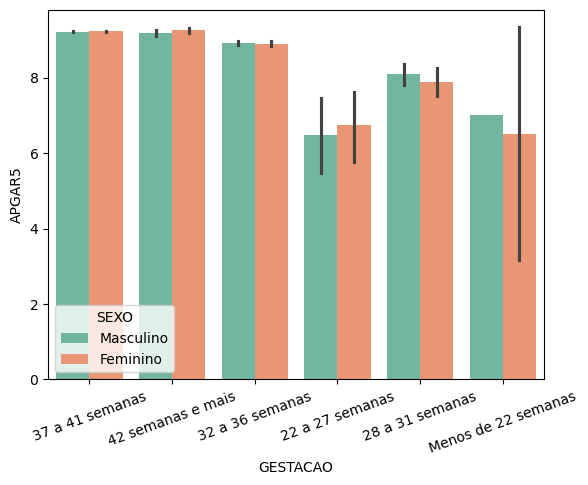

In [116]:
fig, ax = plt.subplots(1)
ax.tick_params(axis='x', rotation=20)
sns.barplot(x = 'GESTACAO', y= 'APGAR5', hue='SEXO', palette="Set2", data= sinasc_RO)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [218]:
#Para ficar melhor para visualizar, estou usando a categorização da variável APGAR5
crosstab_apgar5_gestacao = pd.crosstab(sinasc_RO.GESTACAO, sinasc_RO.APGAR_CAT)
crosstab_apgar5_gestacao

APGAR_CAT,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,1,12,21,51
28 a 31 semanas,12,18,3,129
32 a 36 semanas,19,73,8,2134
37 a 41 semanas,28,196,33,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,0,1,2,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [220]:
cross_apgar5_gestacao.sum(axis =1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [278]:
# a distribuição da variável APGAR5 para cada classe de GESTACAO
crosstab_pctlin = crosstab_apgar5_gestacao.div(cross_apgar5_gestacao.sum(axis =1), axis =0)*100
crosstab_pctlin

APGAR_CAT,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,1.176471,14.117647,24.705882,60.000000
28 a 31 semanas,7.407407,11.111111,1.851852,79.629630
32 a 36 semanas,0.850492,3.267681,0.358102,95.523724
37 a 41 semanas,0.124317,0.870222,0.146517,98.858944
42 semanas e mais,0.143266,0.859599,0.143266,98.853868
Menos de 22 semanas,0.000000,14.285714,28.571429,57.142857


In [280]:
# Verificando se está somando 1 nas linhas
crosstab_pctlin.sum(axis =1)

GESTACAO
22 a 27 semanas        100.0
28 a 31 semanas        100.0
32 a 36 semanas        100.0
37 a 41 semanas        100.0
42 semanas e mais      100.0
Menos de 22 semanas    100.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='Distribuição'>

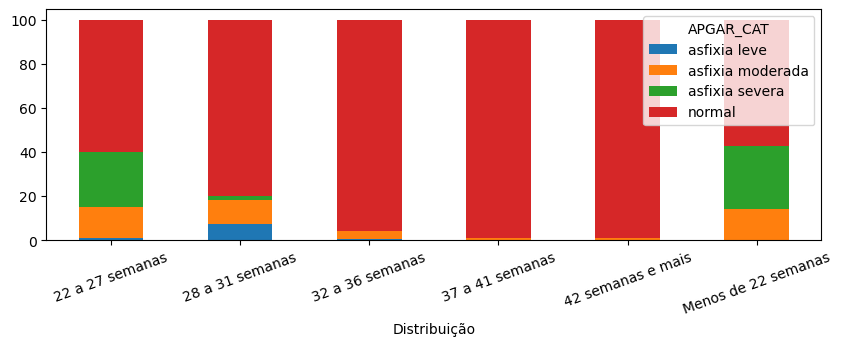

In [308]:
crosstab_pctlin.plot(kind='bar', stacked=True, figsize=(10, 3), rot = 20 , xlabel= 'Distribuição'  )


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR_CAT', ylabel='PESO'>

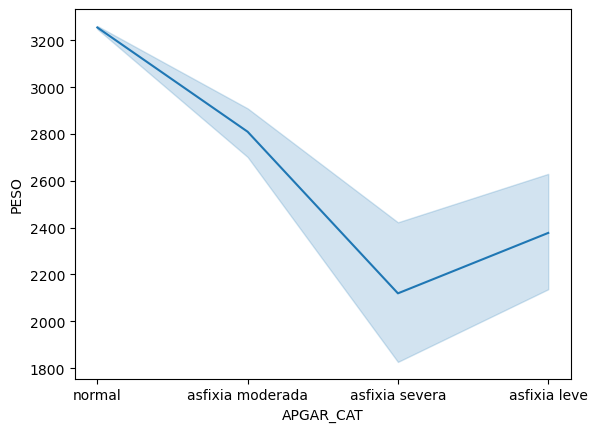

In [246]:
sns.lineplot(x='APGAR_CAT', y='PESO', data=sinasc_RO)